<a href="https://colab.research.google.com/github/mingucci00/Proyecto/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install amuse-framework

In [8]:
import scipy as sp
import astropy as ap
import pandas as pd
import seaborn as cbrn
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from amuse.units import units
from amuse.io import read_set_from_file
from amuse.datamodel import Particles, particles
from amuse.lab import read_set_from_file

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Guardamos los datos en listas.

In [10]:
#Primero guardamos todos los path.
path_carpeta = '/content/drive/MyDrive/sim'
stars = []
gas = []
for i in range(1,91):
  stars.append(path_carpeta+f'/stars_{i}')
  gas.append(path_carpeta+f'/gas_{i}')

#Ahora los abrimos con read_set_from_file y los guardamos en una lista.
star_data = []
for elemento in stars:
  star_data.append(read_set_from_file(filename = elemento, format = 'hdf5'))

gas_data = []
for elemento in gas:
  gas_data.append(read_set_from_file(filename = elemento, format = 'hdf5'))

Conozcamos los atributos.

In [11]:
star_data[0].all_attributes()

['key',
 'mass',
 'potential_in_code',
 'radius',
 'timestep',
 'vx',
 'vy',
 'vz',
 'x',
 'y',
 'z',
 'center_of_mass',
 'mass_segregation_ratio',
 'box_counting_dimension',
 'acceleration',
 'scale_to_standard',
 'mass_segregation_from_nearest_neighbour',
 'potential_energy_in_field',
 'minimum_spanning_tree_length',
 'center_of_mass_velocity',
 'position',
 'rotate',
 'potential_energy',
 'LagrangianRadii',
 'potential',
 'thermal_energy',
 'velocity',
 'move_to_center',
 'natal_kick_velocity',
 'total_radius',
 'oblateness',
 'mass_segregation_Gini_coefficient',
 'virial_radius',
 'Qparameter',
 'add_spin',
 'total_momentum',
 'specific_kinetic_energy',
 'kinetic_energy',
 'densitycentre_coreradius_coredens',
 'find_closest_particle_to',
 'angular_momentum',
 'nearest_neighbour',
 'total_angular_momentum',
 'binaries',
 'cluster_core',
 'bound_subset',
 'new_particle_from_cluster_core',
 'distances_squared',
 'total_mass',
 'moment_of_inertia',
 'correlation_dimension',
 'dynamical

Calculamos el centro de masa!

In [18]:
def r6(particles, indice):
  x0 = particles[indice].x
  y0 = particles[indice].y
  z0 = particles[indice].z
  d = ((particles.x-x0)**2+(particles.y-y0)**2+(particles.z-z0)**2).sqrt()
  return np.sort(d.value_in(units.parsec))[6]

CMs=[]
for j in range(0,len(star_data)):
  up = 0
  down = 0
  for i in range(0,len(star_data[j])):
    r6i = r6(star_data[j],i)
    up += (star_data[j][i].x.value_in(units.parsec), star_data[j][i].y.value_in(units.parsec), star_data[j][i].z.value_in(units.parsec))/r6i**3
    down += 1/r6i**3
  r = up/down
  CMs.append(r)

CMg=[]
for j in range(0,len(gas_data)):
  up = 0
  down = 0
  for i in range(0,len(gas_data[j])):
    r6i = r6(gas_data[j],i)
    up += (gas_data[j][i].x.value_in(units.parsec), gas_data[j][i].y.value_in(units.parsec), gas_data[j][i].z.value_in(units.parsec))/r6i**3
    down += 1/r6i**3
  r = up/down
  CMg.append(r)

In [25]:
CMg

[array([  1.00205347e+00,   4.99974920e-01,   5.05508986e-04]),
 array([  1.00198151e+00,   4.99709544e-01,   2.41741411e-04]),
 array([  1.00180977e+00,   4.98963078e-01,   4.08066140e-04]),
 array([  1.00120043e+00,   4.99081000e-01,   9.00989540e-04]),
 array([  1.00050494e+00,   4.99001782e-01,   9.62635468e-04]),
 array([  9.99587207e-01,   4.98262804e-01,   7.24976496e-04]),
 array([  9.98364555e-01,   4.97571747e-01,   5.31575005e-04]),
 array([  9.96984405e-01,   4.96717656e-01,   5.98028823e-04]),
 array([  9.95400628e-01,   4.95779511e-01,   5.20952216e-04]),
 array([  9.93725465e-01,   4.94859489e-01,   5.00364320e-04]),
 array([  9.92082675e-01,   4.94130323e-01,   4.44803432e-04]),
 array([  9.89919400e-01,   4.93025460e-01,   6.24919957e-04]),
 array([  9.87423675e-01,   4.91685486e-01,   5.37941100e-04]),
 array([  9.84890413e-01,   4.90364021e-01,   4.51297189e-04]),
 array([  9.82064845e-01,   4.88768048e-01,   3.23403018e-04]),
 array([  9.79110542e-01,   4.87102538e-

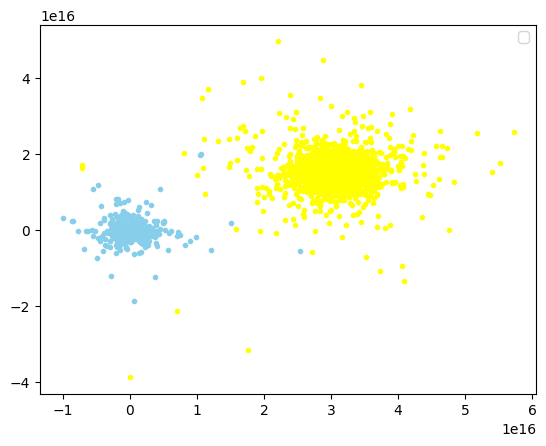

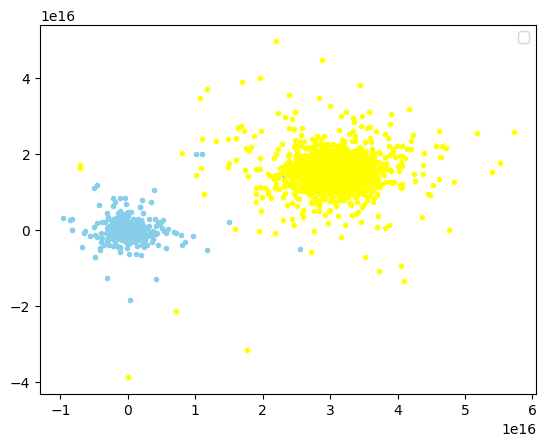

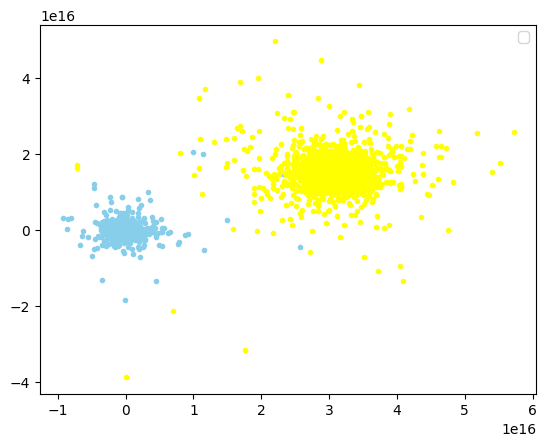

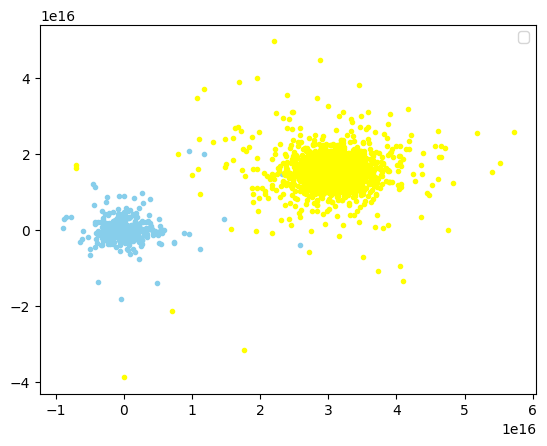

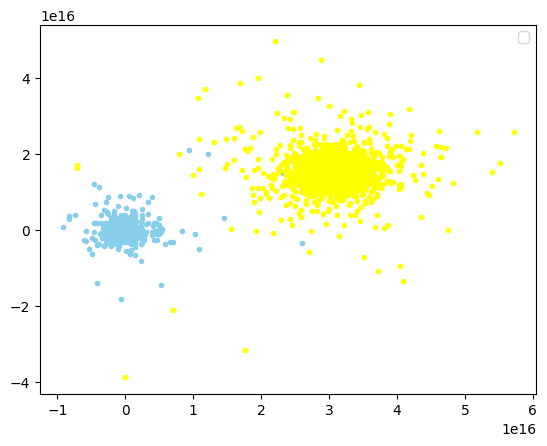

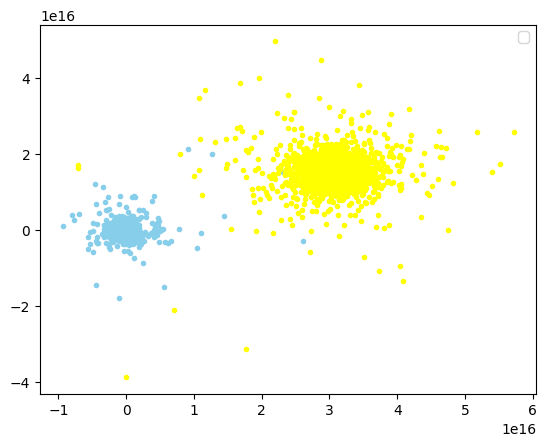

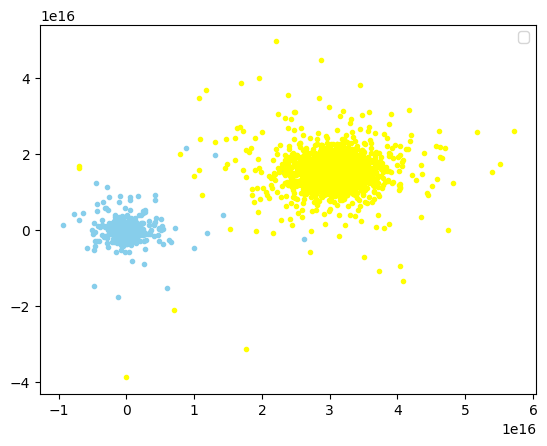

KeyboardInterrupt: 

In [26]:
for i in range(0,len(star_data)):
  xs1= star_data[i].x.value_in(units.m)
  ys1= star_data[i].y.value_in(units.m)
  zs1= star_data[i].z.value_in(units.m)

  xg1= gas_data[i].x.value_in(units.m)
  yg1= gas_data[i].y.value_in(units.m)
  zg1= gas_data[i].z.value_in(units.m)

  plt.plot(xs1,ys1, '.', color='skyblue')
  plt.plot(xg1,yg1, '.', color='yellow')
  plt.plot([CMs[i][0],CMg[i][0]],[CMs[i][1],CMg[i][1]], color='red')
  plt.legend()
  plt.show()

In [ ]:
CMs[0][1]

-0.0025352557673539514

Ahora veamos los potenciales

In [20]:
from amuse.datamodel import Particles, particles
from amuse.lab import read_set_from_file
Ep_gas_lista = []
Ep_stars_lista = []
for i in range(0,len(gas_data)):
  gas = gas_data[i]
  stars = star_data[i]
  all = particles.ParticlesSuperset([gas, stars])
  key_gas = all.get_intersecting_subset_in(gas).key
  mask_gas = all.get_indices_of_keys(key_gas)

  key_stars = all.get_intersecting_subset_in(stars).key
  mask_stars = all.get_indices_of_keys(key_stars)
  Ep = (all.potential()*all.mass/2)
  Ep_gas = Ep[mask_gas].sum().value_in(units.erg)
  Ep_stars = Ep[mask_stars].sum().value_in(units.erg)
  Ep_gas_lista.append(Ep_gas)
  Ep_stars_lista.append(Ep_stars)



KeyboardInterrupt: 

In [ ]:
Ep_gas_lista[22]

-1.203075842183649e+51

In [ ]:
Ec_gas_lista = []
Ec_stars_lista = []
for i in range(0,len(gas_data)):
  gas = gas_data[i]
  stars = star_data[i]
  k_g = (gas.kinetic_energy() + gas.thermal_energy()).value_in(units.erg)
  k_s = stars.kinetic_energy().value_in(units.erg)
  Ec_gas_lista.append(k_g)
  Ec_stars_lista.append(k_s)

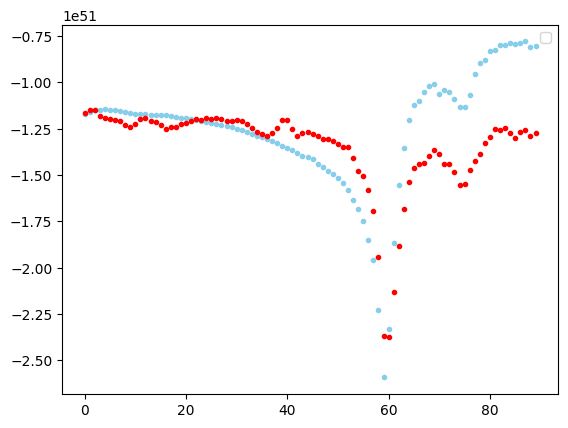

In [ ]:
plt.plot(range(90),Ep_gas_lista,".", color='skyblue')
plt.plot(range(90),Ep_stars_lista,".", color='red')
plt.legend()
plt.show()

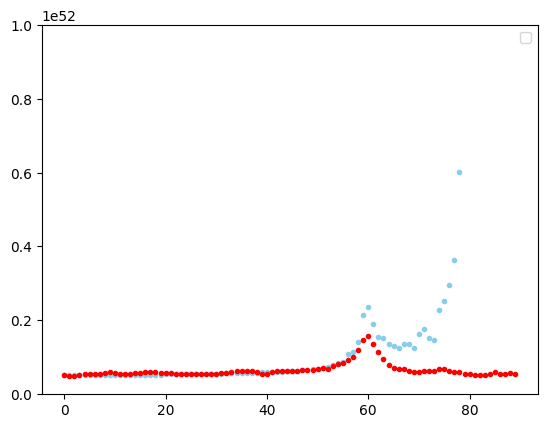

In [ ]:
plt.plot(range(90),Ec_gas_lista,".", color='skyblue')
plt.plot(range(90),Ec_stars_lista,".", color='red')
plt.ylim(0,1e52)
plt.legend()
plt.show()

Estudiamos la pérdida de masa

In [ ]:
radioVirial = all.virial_radius().as_quantity_in(units.pc)
print(radioVirial)

0.2060815913 parsec


In [ ]:
plt.plot(xs1,ys1, '.', color='skyblue')
plt.plot(centerMs1[0],segRatMs1, color='blue')
plt.plot(xg1,yg1, '.', color='yellow')
plt.plot([centerMs1[0],centerMg1[0]],[centerMs1[1],centerMg1[1]], color='red')
plt.legend()
plt.show()

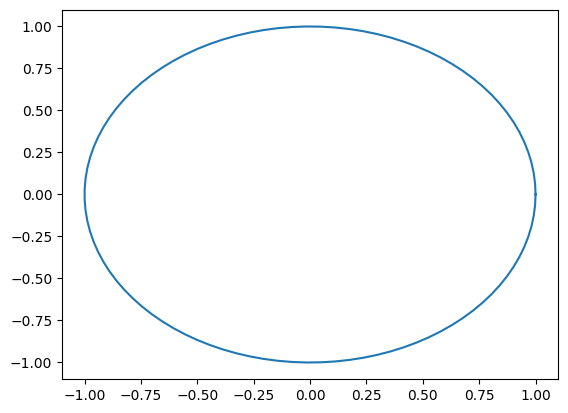

In [ ]:
a = np.linspace(0,np.pi*2,100)
x = np.cos(a)
y = np.sin(a)
plt.plot(x,y)
plt.show()
#